In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
import scipy.cluster.hierarchy as ch
import warnings 
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data,columns=data.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.keys()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'petal_length')

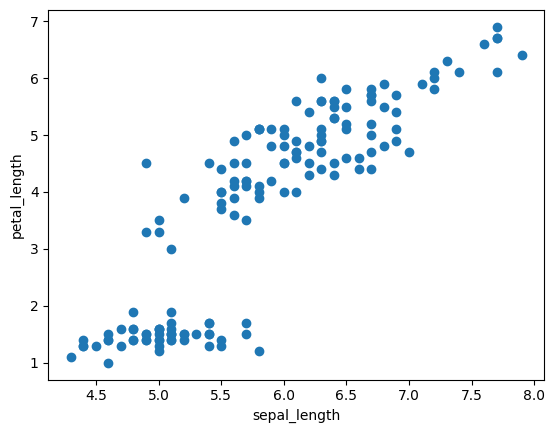

In [9]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'])

plt.xlabel('sepal_length')
plt.ylabel('petal_length')

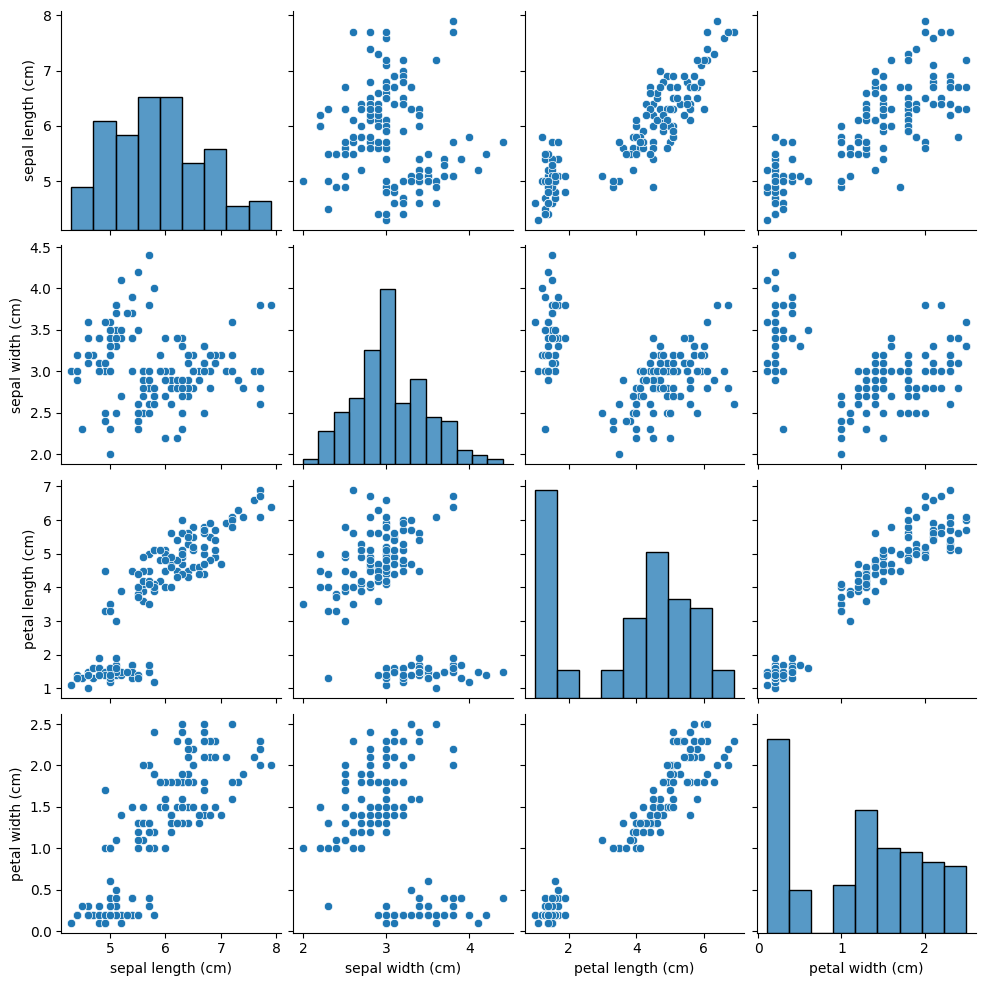

In [10]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

In [11]:
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df)

# KMeans Clustering 

KMeans is an iterative clustering algorithm that partitions the data into K clusters by minimizing the distance between data points and the centroid of their assigned clusters. The algorithm follows these steps:

* Initialize K centroids randomly.
* Assign each data point to the nearest centroid.
* Recompute the centroids based on the current cluster members.
* Repeat until convergence (when the centroids no longer change).

### Why KMeans is suitable for the Iris dataset:
The Iris dataset contains natural groupings (species) which can be captured well by clustering. KMeans is effective at finding spherical clusters, and since the dataset has continuous numeric features, KMeans works well for this task.

## KMeans Implementation

In [13]:
kmeans = KMeans(n_clusters=3,random_state=42)
clusters = kmeans.fit_predict(df_scaled)
df['cluster'] = clusters

## Visualization

Text(0, 0.5, 'Feature 2')

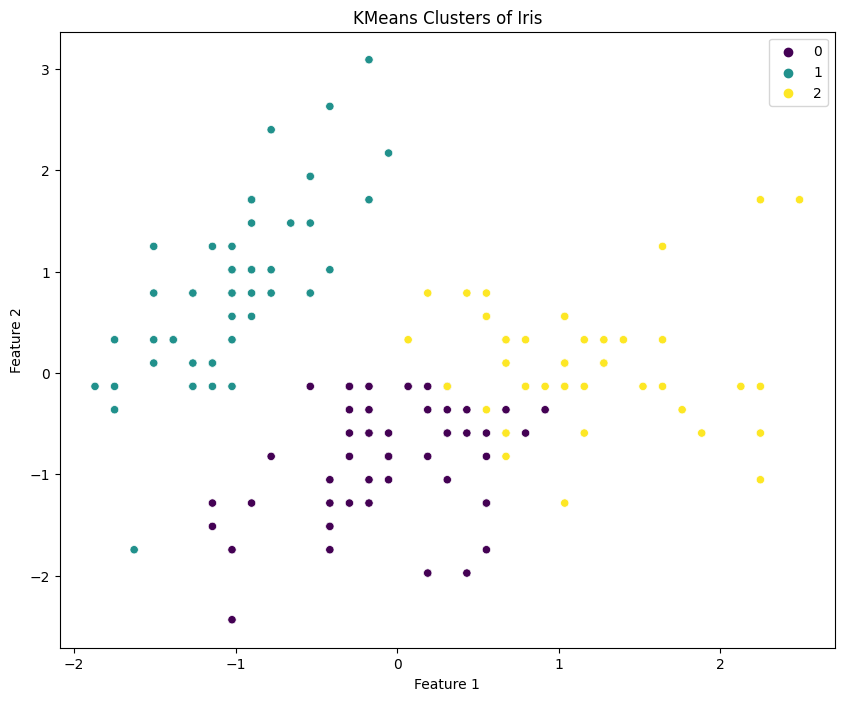

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_scaled[:,0],y=df_scaled[:,1],hue=clusters,palette='viridis')
plt.title('KMeans Clusters of Iris')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

In [15]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Hierarchical Clustering 

Hierarchical clustering builds a hierarchy of clusters by either merging (agglomerative) or splitting (divisive) clusters. In agglomerative clustering, it starts with individual data points and merges them iteratively based on their similarity until only one cluster remains. A dendrogram is typically used to visualize the cluster merging process.

### Why Hierarchical Clustering is suitable for the Iris dataset: 
Hierarchical clustering provides a more interpretable model by representing how clusters are formed step-by-step, which can be useful in a small, well-structured dataset like Iris. It doesn't require predefining the number of clusters, making it flexible in exploring the natural structure of the data.

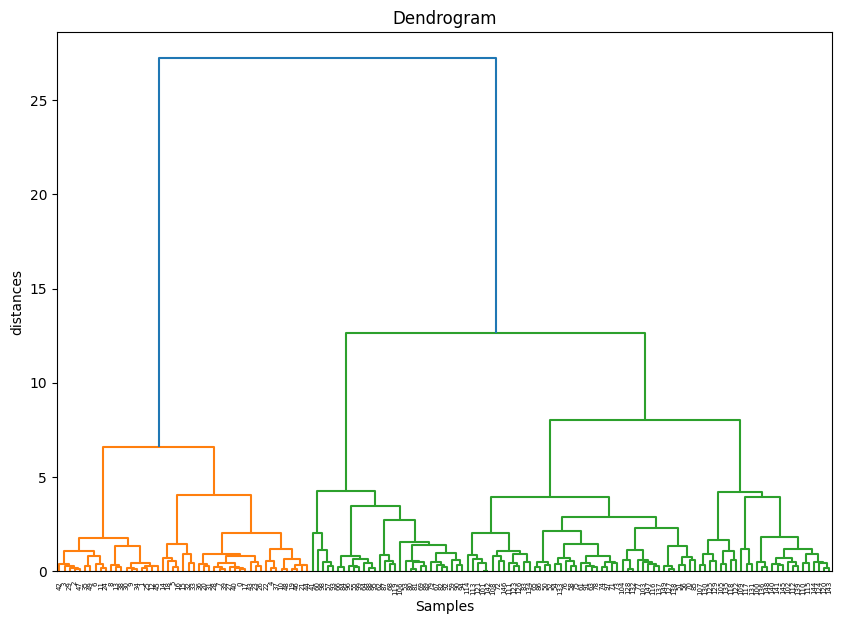

In [20]:
plt.figure(figsize=(10, 7))
dendrogram = ch.dendrogram(ch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('distances')
plt.show()

## Hierarchical Clustering Implementation

In [24]:
sch = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward')
s_ch = sch.fit_predict(df_scaled)

##  Visualization

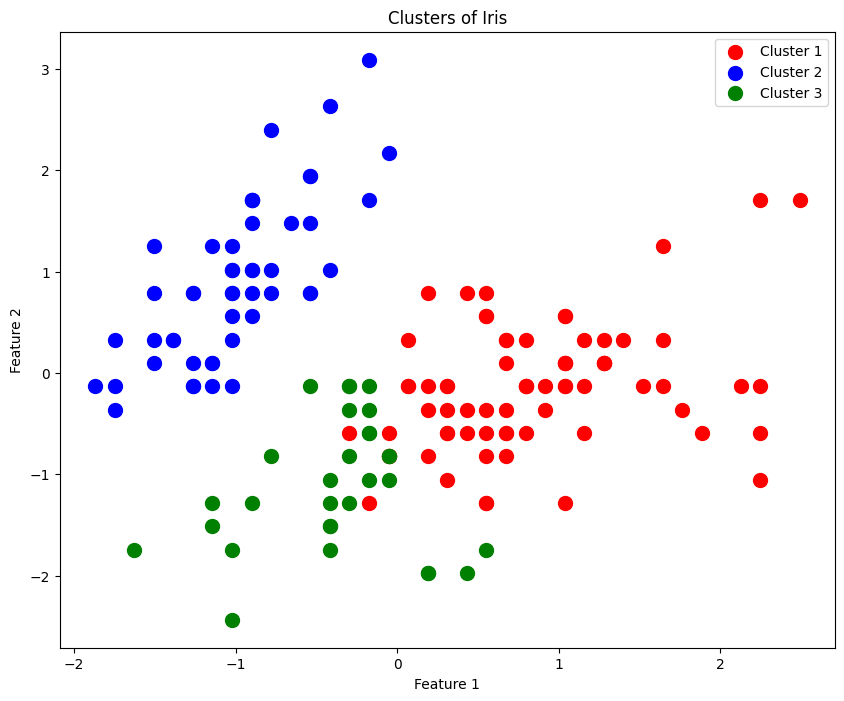

In [30]:
plt.figure(figsize=(10,8))
plt.scatter(df_scaled[s_ch == 0, 0], df_scaled[s_ch == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(df_scaled[s_ch == 1, 0], df_scaled[s_ch == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(df_scaled[s_ch == 2, 0], df_scaled[s_ch == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Iris')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()